In [ ]:
!pip install pycaret

In [2]:
exit() # Reset kernel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *

In [2]:
import urllib.request
url = 'https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf'
filename = 'thsarabunnew-webfont.ttf'
urllib.request.urlretrieve(url, filename)

('thsarabunnew-webfont.ttf', <http.client.HTTPMessage at 0x7fa7e0959be0>)

In [3]:
# !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
from matplotlib import font_manager
font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
plt.rc('font', family='TH Sarabun New')

In [ ]:
help(create_model)

In [5]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSsec6hYwoQMBOv9oPwcJjvVqPGhKWW6y-HRnmwf9GzwSXkbxRLxu3lKmBmRKPep7my91On7Or0TPn7/pub?gid=581058147&single=true&output=csv'
df = pd.read_csv(url)

## Clean Data

In [6]:
# preview data
df.head()

,Timestamp,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
0,21/01/2023 11:10:08,MariKoh,Male,25 - 35,3,5,4,3,3,3,NaN,4,2,3,3,4.0,1,5.0,1,1
1,21/01/2023 11:10:28,Noon,Female,25 - 35,3,4,4,5,5,5,5.0,1,1,4,2,4.0,4,3.0,3,4
2,21/01/2023 11:10:36,jjellatinn,Female,25 - 35,5,5,5,5,4,4,5.0,5,1,5,5,5.0,5,1.0,5,5
3,21/01/2023 11:10:38,ด๋อย,Male,25 - 35,3,4,5,5,4,4,5.0,3,3,2,5,2.0,5,3.0,5,1
4,21/01/2023 11:10:41,Illumi,Male,25 - 35,4,4,5,3,4,5,5.0,1,3,3,4,3.0,4,3.0,3,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          103 non-null    object 
 1   nickname           103 non-null    object 
 2   gender             103 non-null    object 
 3   age                103 non-null    object 
 4   ภูเขา              103 non-null    int64  
 5   ทะเล               103 non-null    int64  
 6   อยู่บ้าน           103 non-null    int64  
 7   ฟังเพลง            103 non-null    int64  
 8   ดูหนัง             103 non-null    int64  
 9   เล่นเกมส์          103 non-null    int64  
 10  เสต็ก              102 non-null    float64
 11  ส้มตำ              103 non-null    int64  
 12  สลัด               103 non-null    int64  
 13  ซีรี่เกาหลี        103 non-null    int64  
 14  หนังซุปเปอร์ฮีโร่  103 non-null    int64  
 15  สีฟ้า              102 non-null    float64
 16  สีขาว              103 non

In [ ]:
# filter out N/A
df = df.dropna()
df.head()

In [ ]:
# change data type
convert_dict = {'เสต็ก': int,
                'สีฟ้า': int,
                'ผมสั้น': int
                }
df = df.astype(convert_dict)
df.head()

In [10]:
# drop unnessary columns
df = df.drop(columns = ['Timestamp'])

## Exploratory Data Analysis

In [11]:
# preview data
df.head()

,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
1,Noon,Female,25 - 35,3,4,4,5,5,5,5,1,1,4,2,4,4,3,3,4
2,jjellatinn,Female,25 - 35,5,5,5,5,4,4,5,5,1,5,5,5,5,1,5,5
3,ด๋อย,Male,25 - 35,3,4,5,5,4,4,5,3,3,2,5,2,5,3,5,1
4,Illumi,Male,25 - 35,4,4,5,3,4,5,5,1,3,3,4,3,4,3,3,3
5,Chomchom,Female,18 - 25,5,2,5,5,5,3,4,4,4,4,4,5,2,3,5,5


In [12]:
df.describe()

,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
count,100.00000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.94000,3.970000,4.220000,4.310000,4.1400,3.800000,4.000000,3.320000,2.920000,3.140000,3.830000,3.530000,3.820000,3.690000,2.910000,2.430000
std,0.96211,1.048857,1.000808,0.895499,0.8648,1.414214,1.073087,1.434636,1.268738,1.333485,1.214849,1.274894,1.131549,1.252835,1.364003,1.387207
min,1.00000,1.000000,1.000000,1.000000,2.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.00000,3.000000,4.000000,4.000000,4.0000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,4.00000,4.000000,5.000000,5.000000,4.0000,4.000000,4.000000,3.500000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000
75%,5.00000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.250000
max,5.00000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
df.iloc[:,1:].groupby('gender').mean()

,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
gender,,,,,,,,,,,,,,,,
Female,4.083333,3.888889,4.444444,4.638889,4.194444,3.138889,3.555556,3.888889,3.000,3.472222,3.611111,4.138889,3.750000,3.277778,2.694444,3.222222
Male,3.859375,4.015625,4.093750,4.125000,4.109375,4.171875,4.250000,3.000000,2.875,2.953125,3.953125,3.187500,3.859375,3.921875,3.031250,1.984375


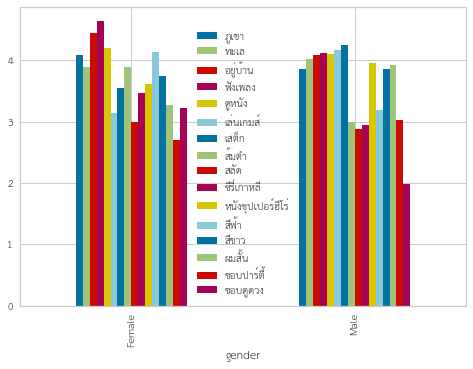

In [14]:
# ดูค่าเฉลี่ยคะแนนแต่ละ columns แบ่งตามเพศ โดย ผญ จะชอบฟังเพลงมากที่สุด ส่วน ผช ชอบสเต็กมากที่สุด
df.iloc[:,1:].groupby('gender').mean().plot.bar()

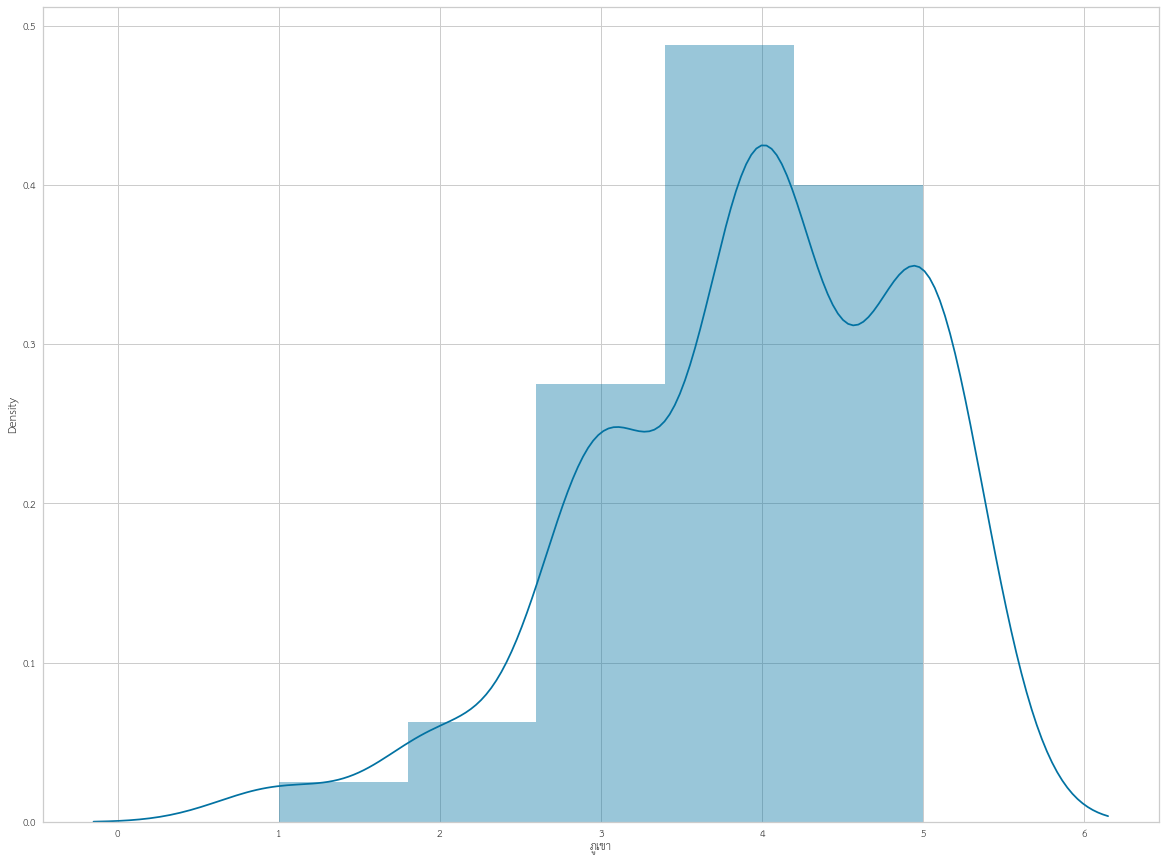

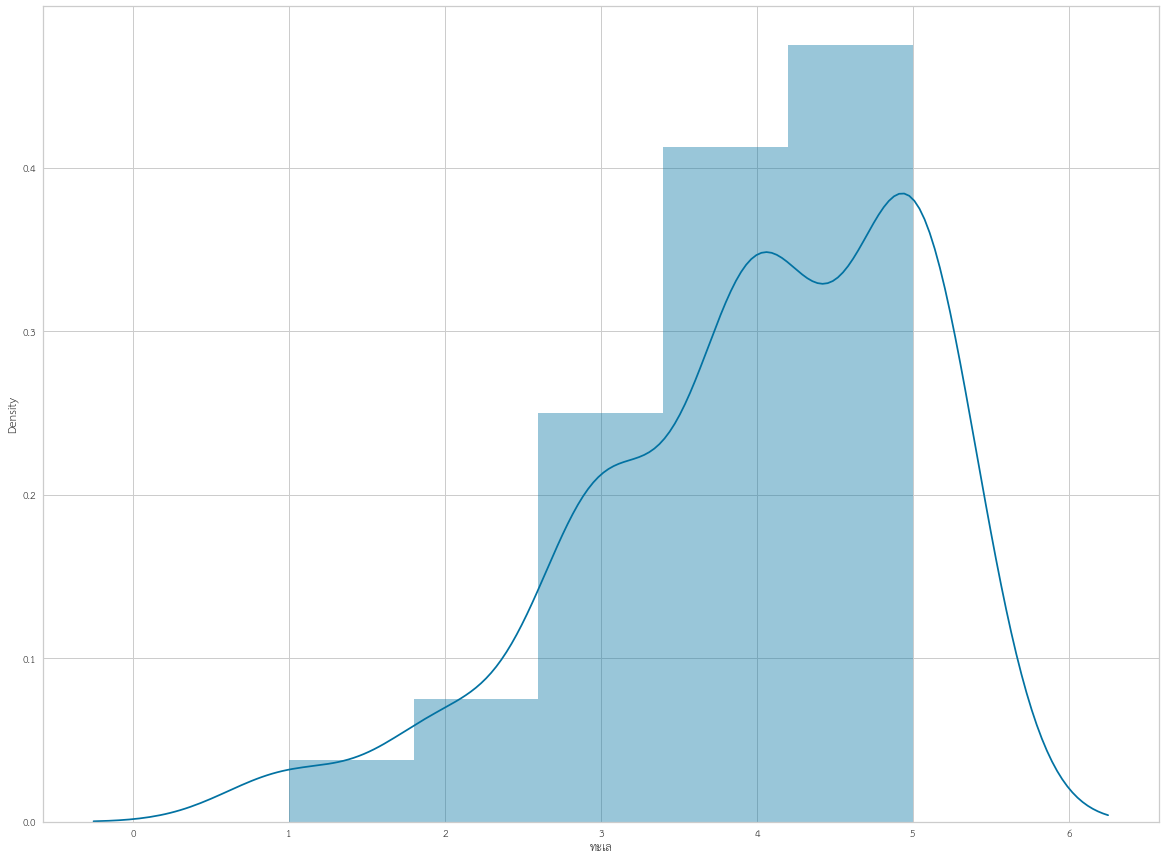

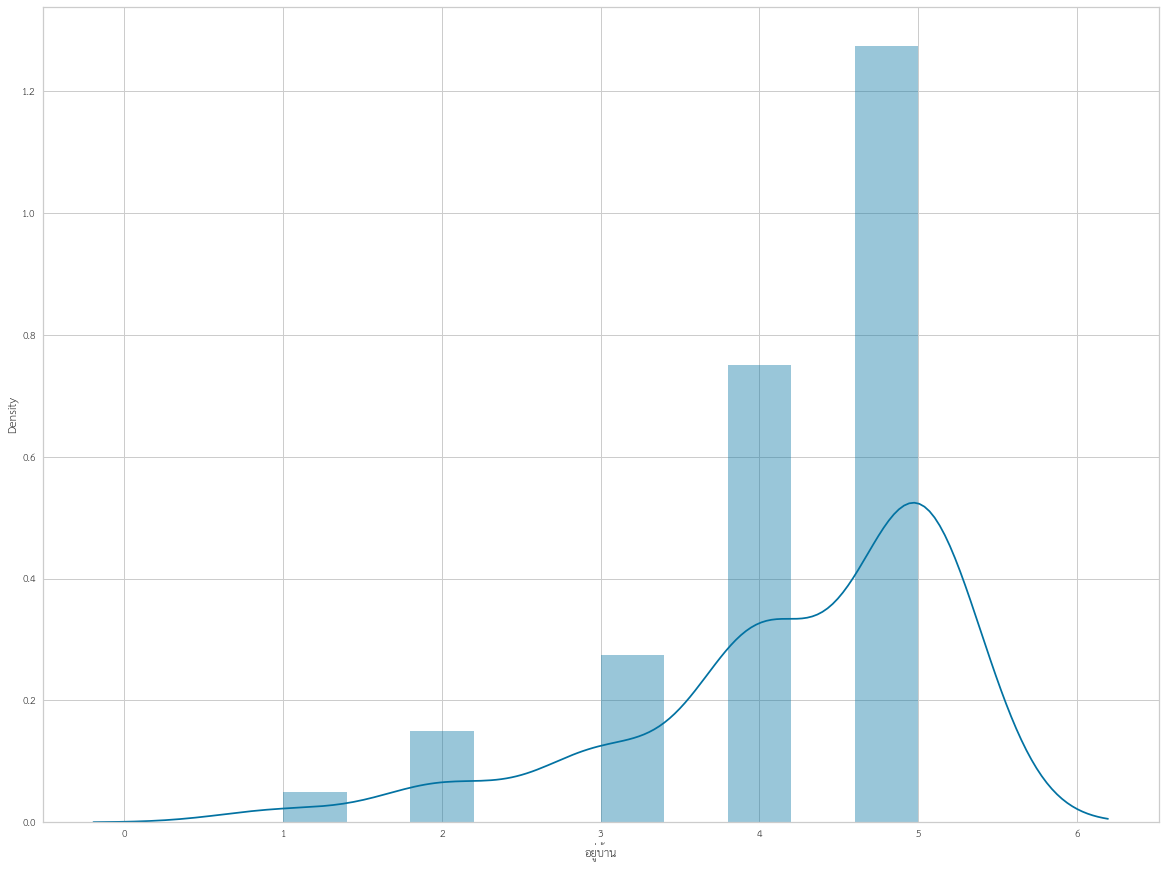

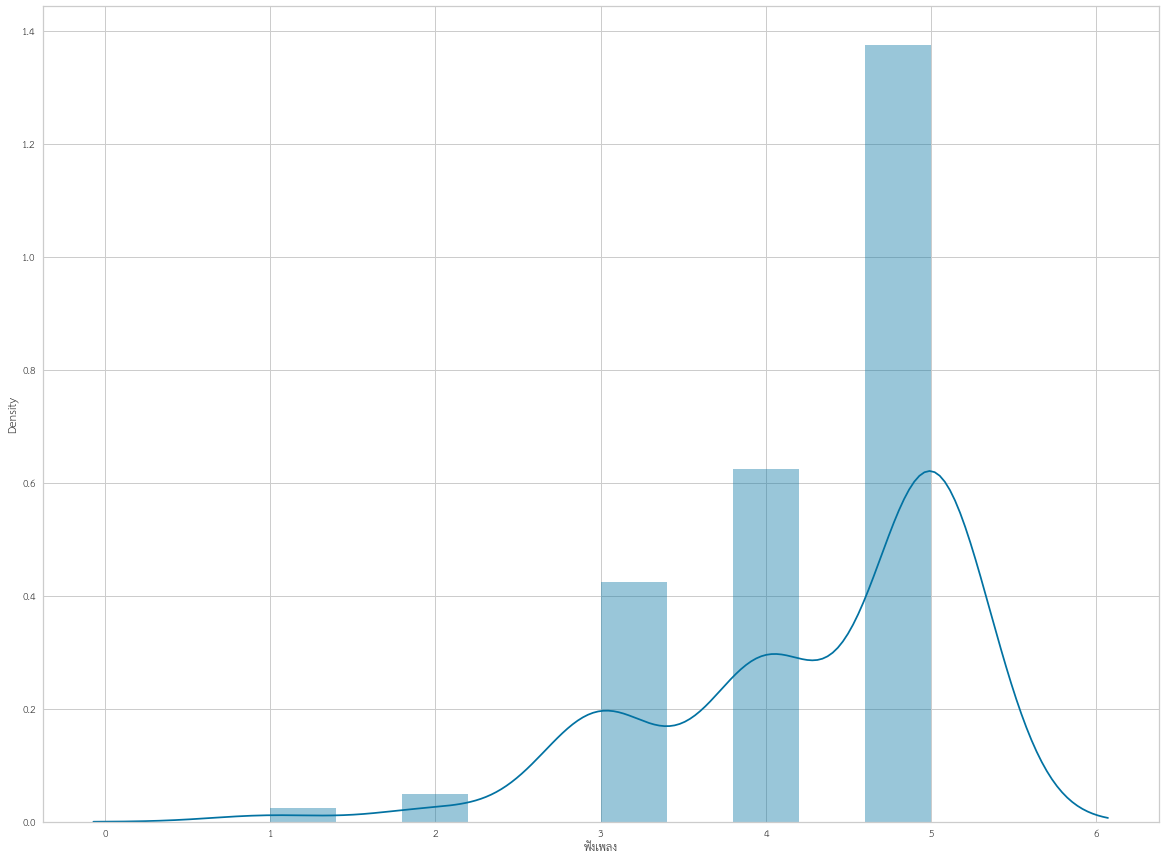

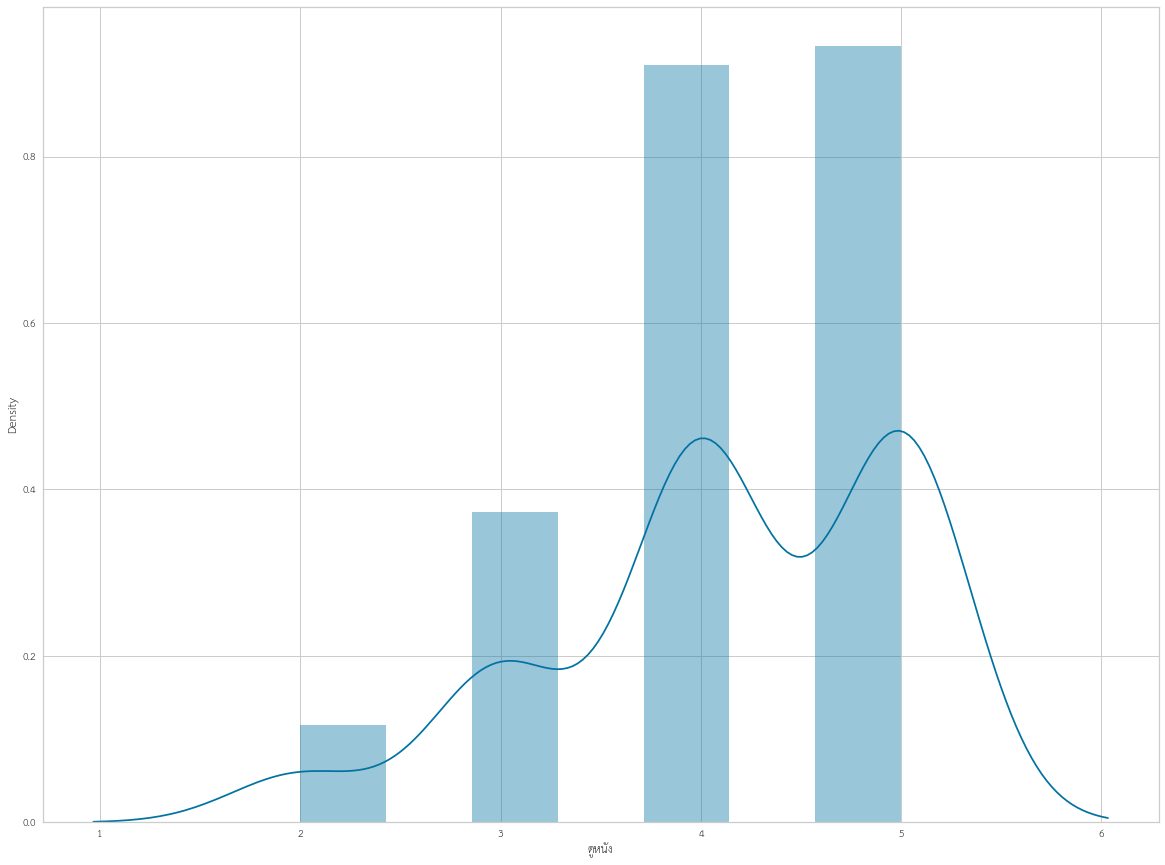

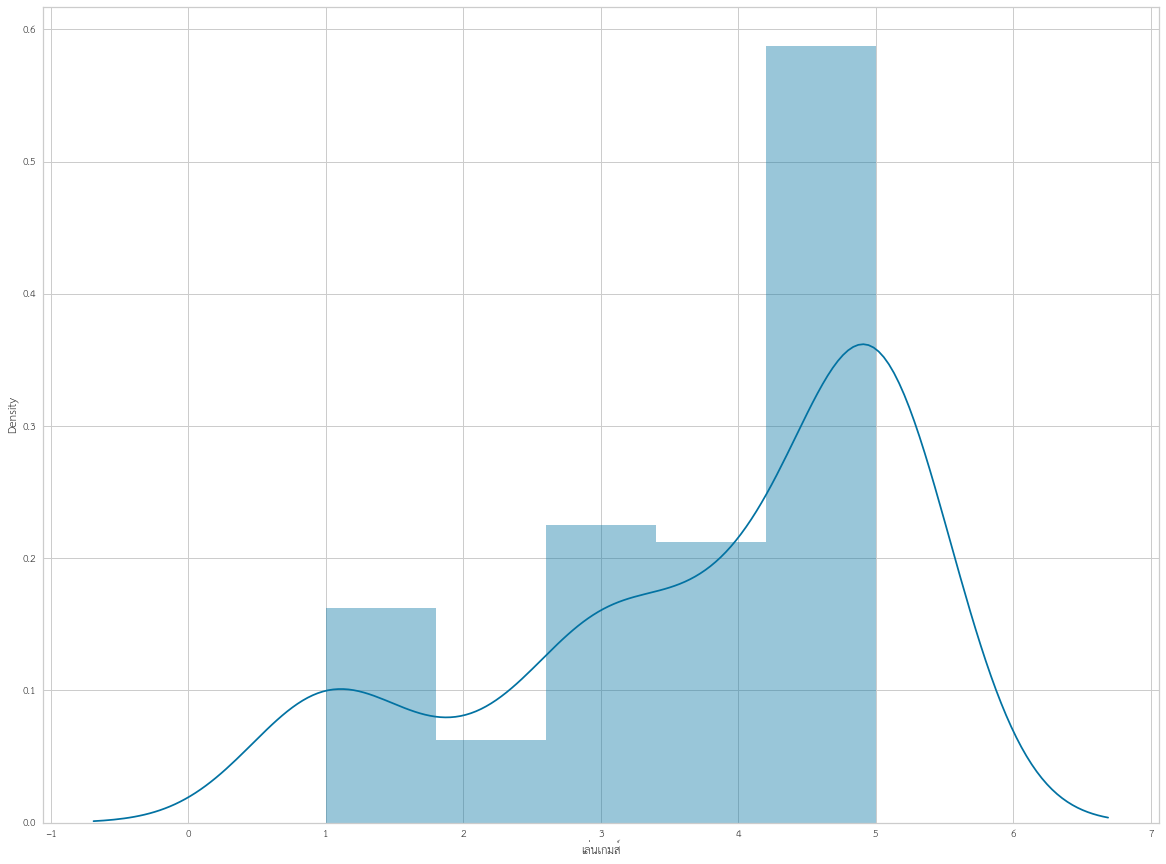

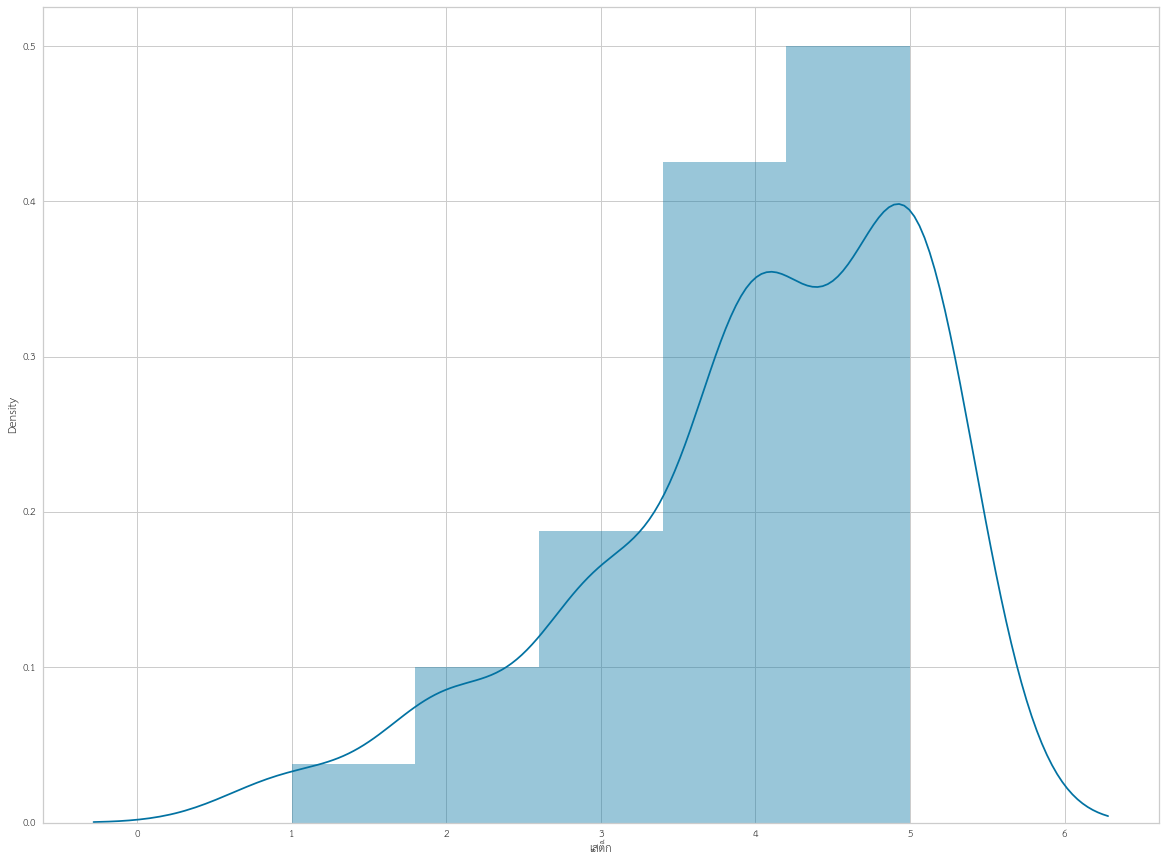

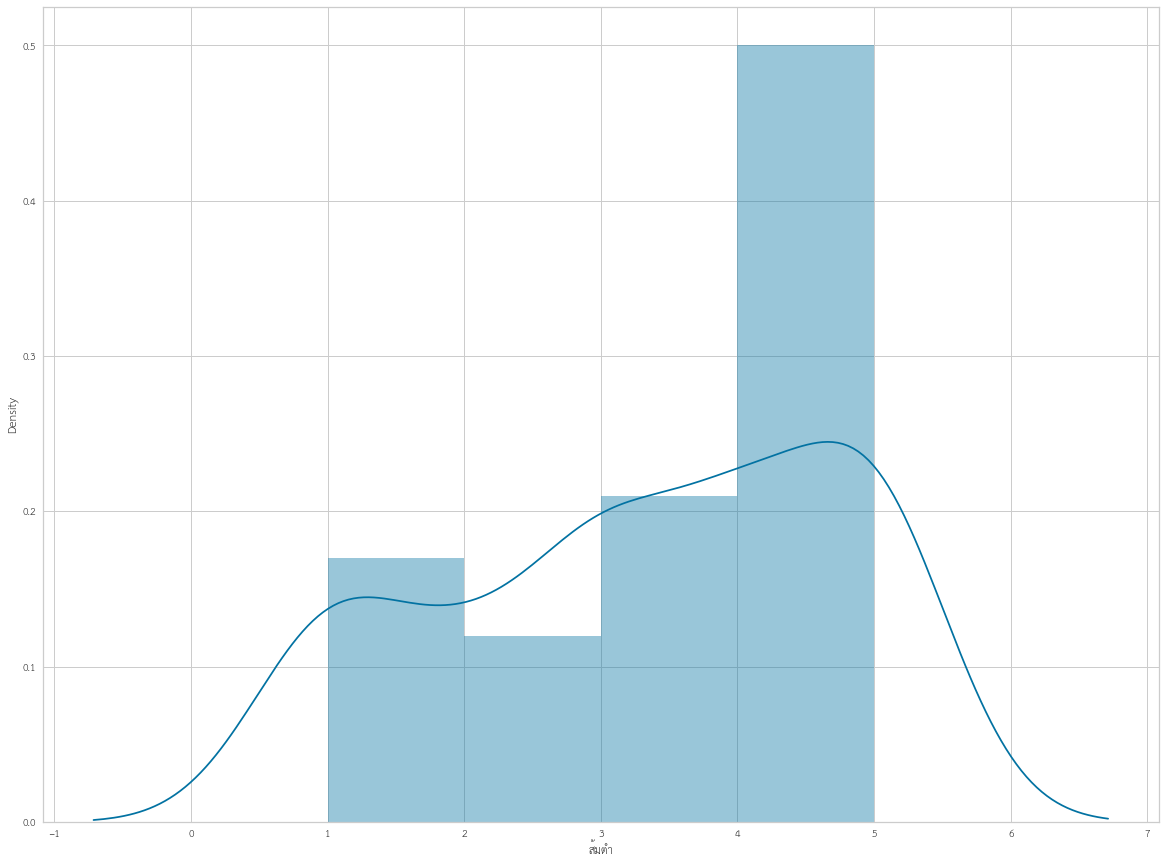

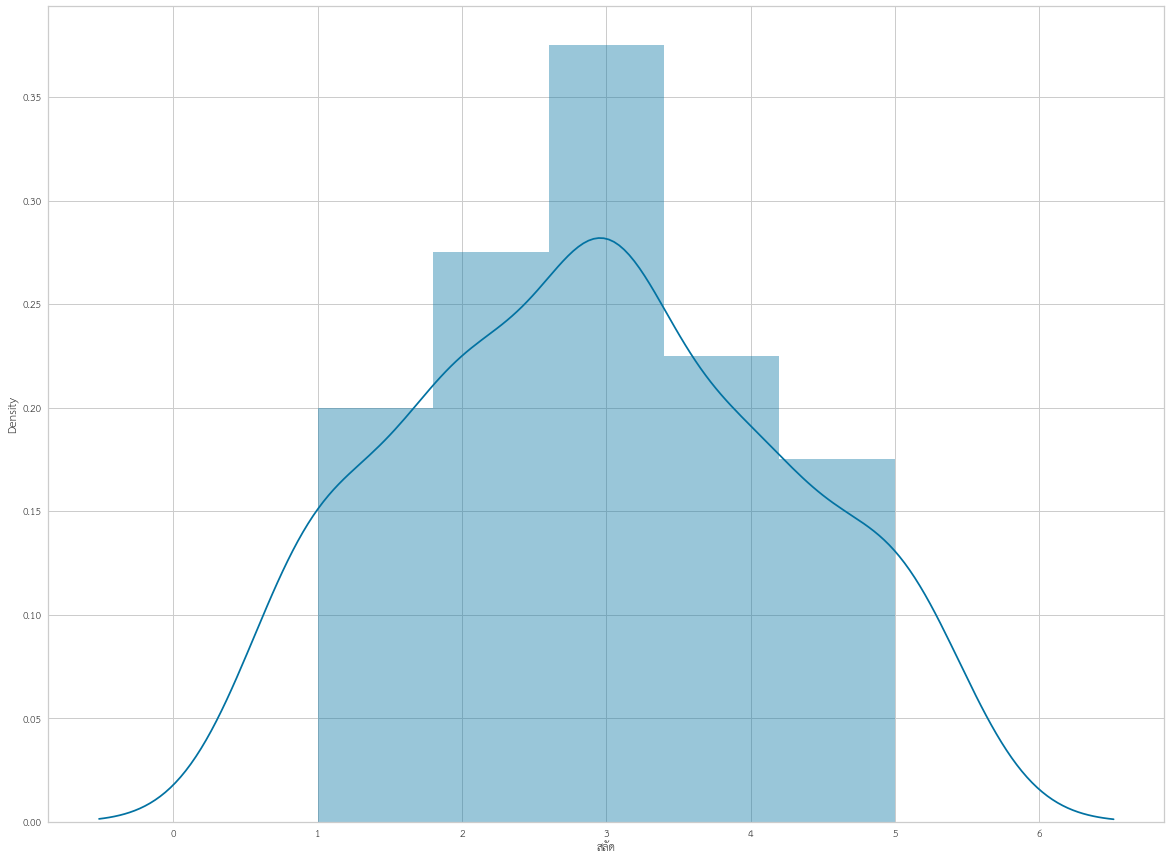

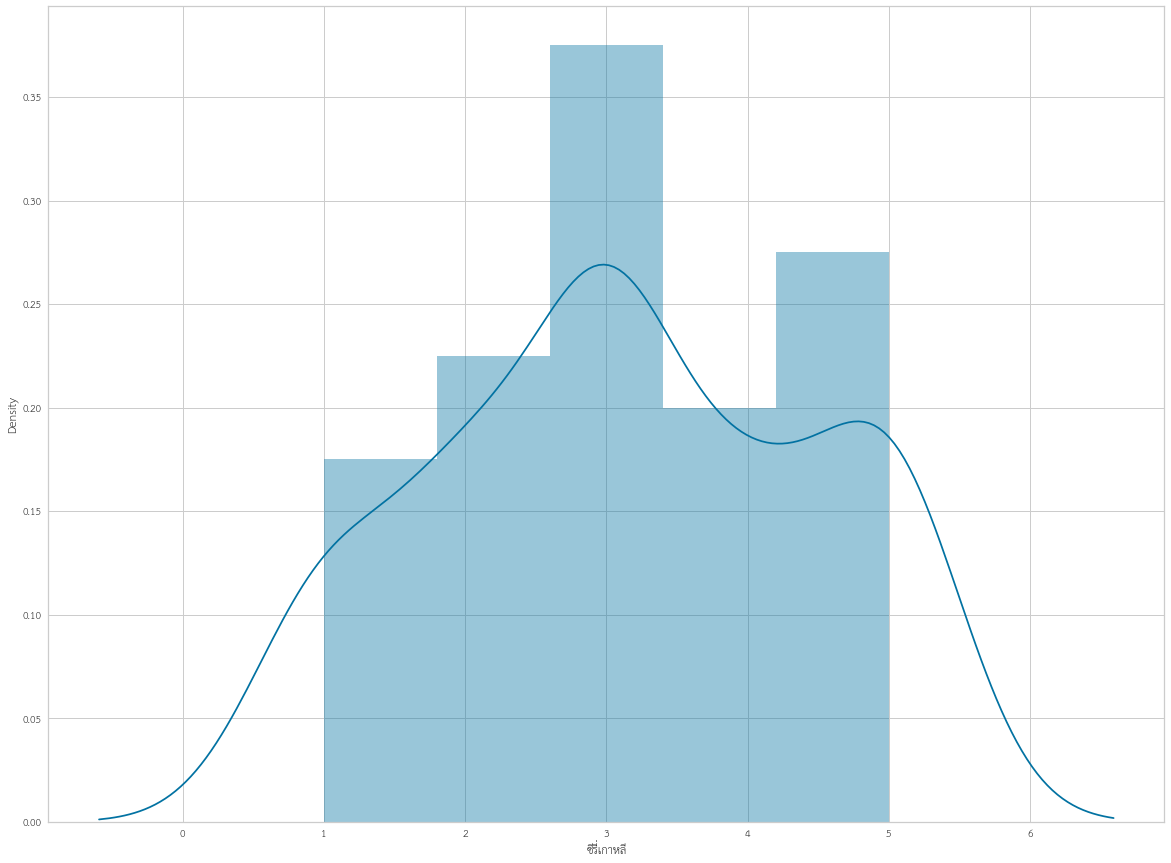

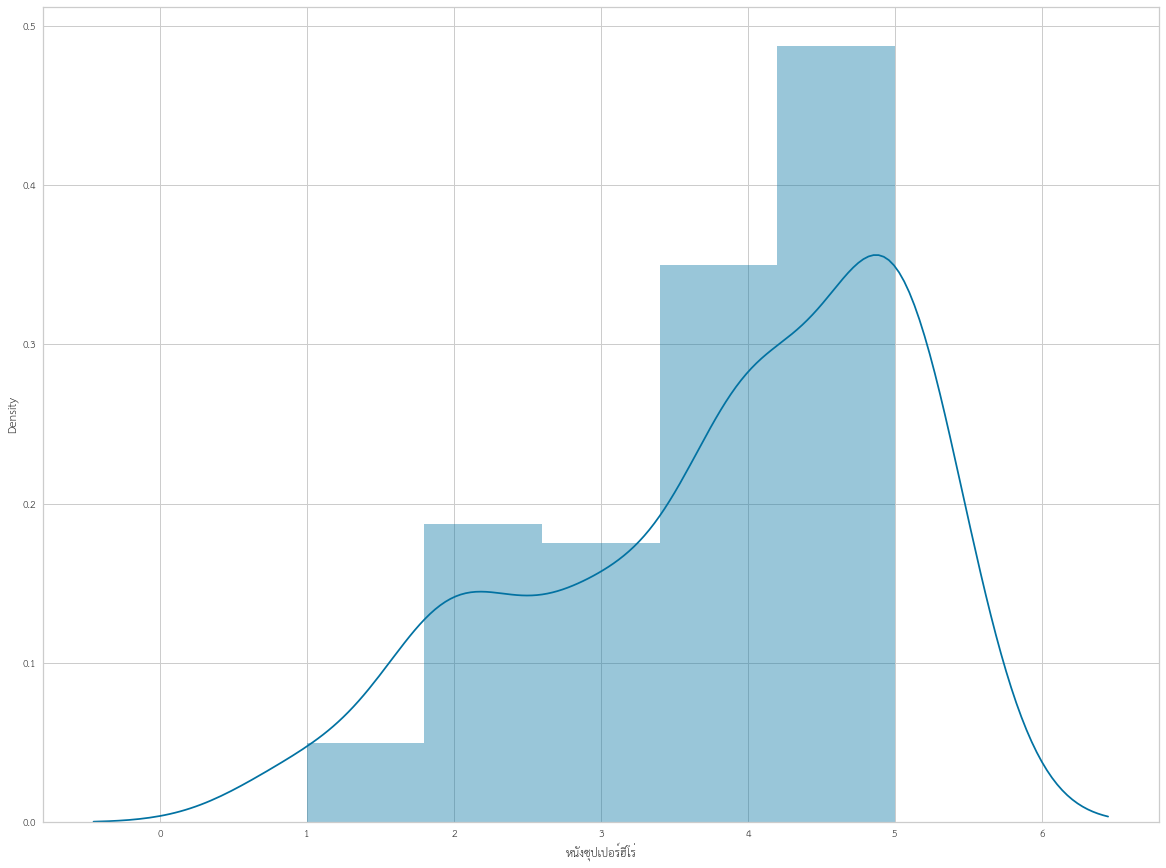

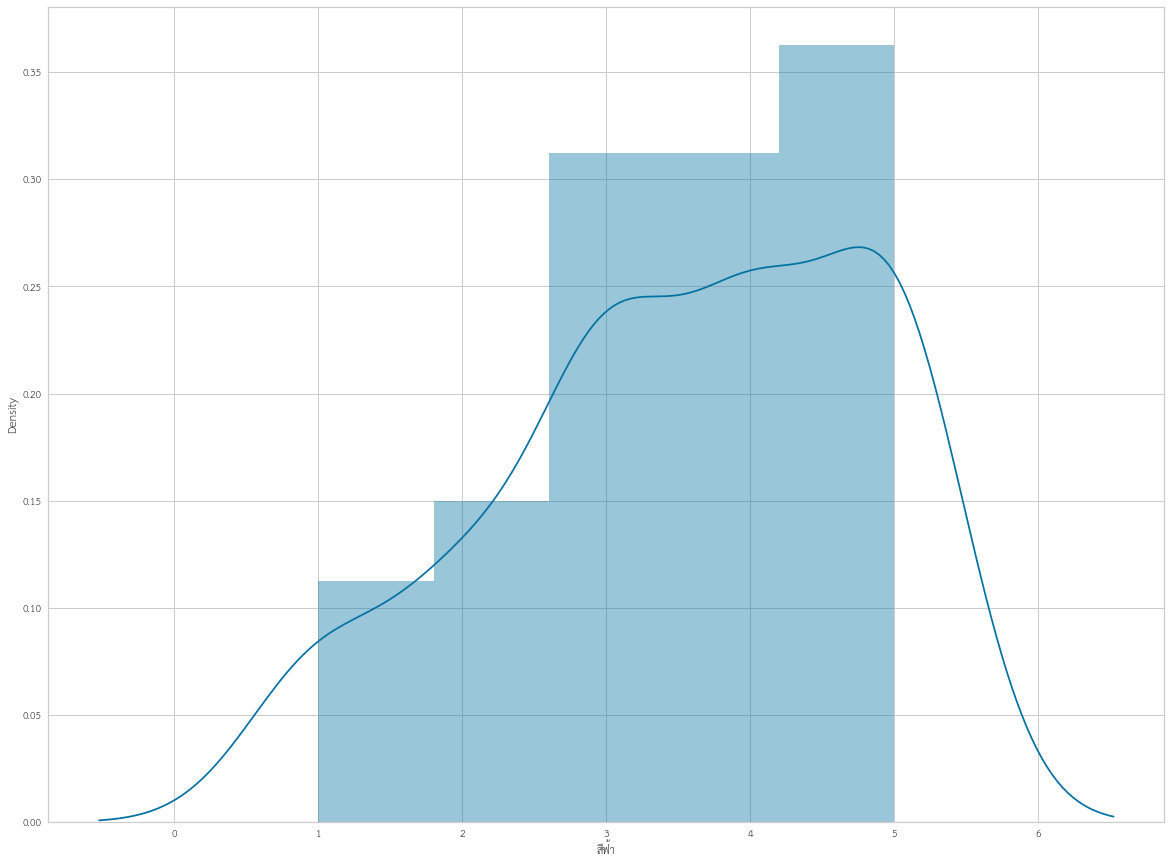

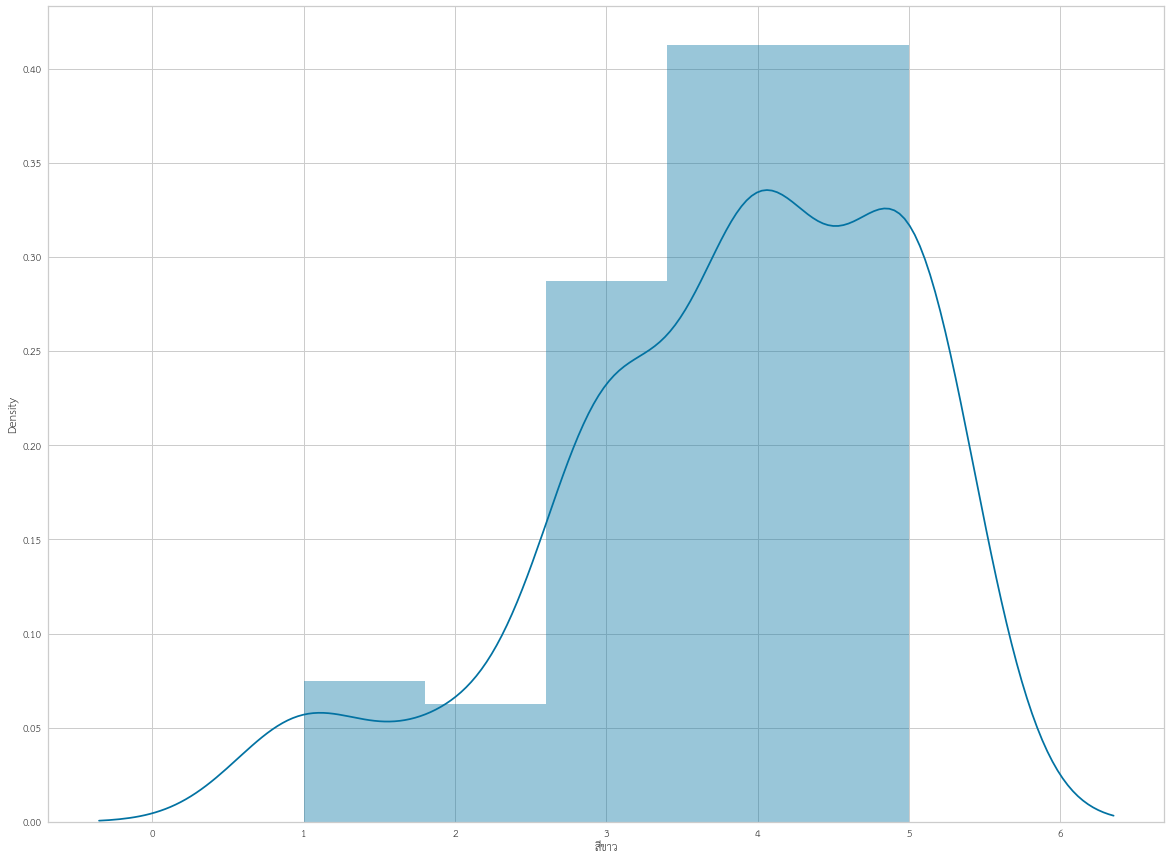

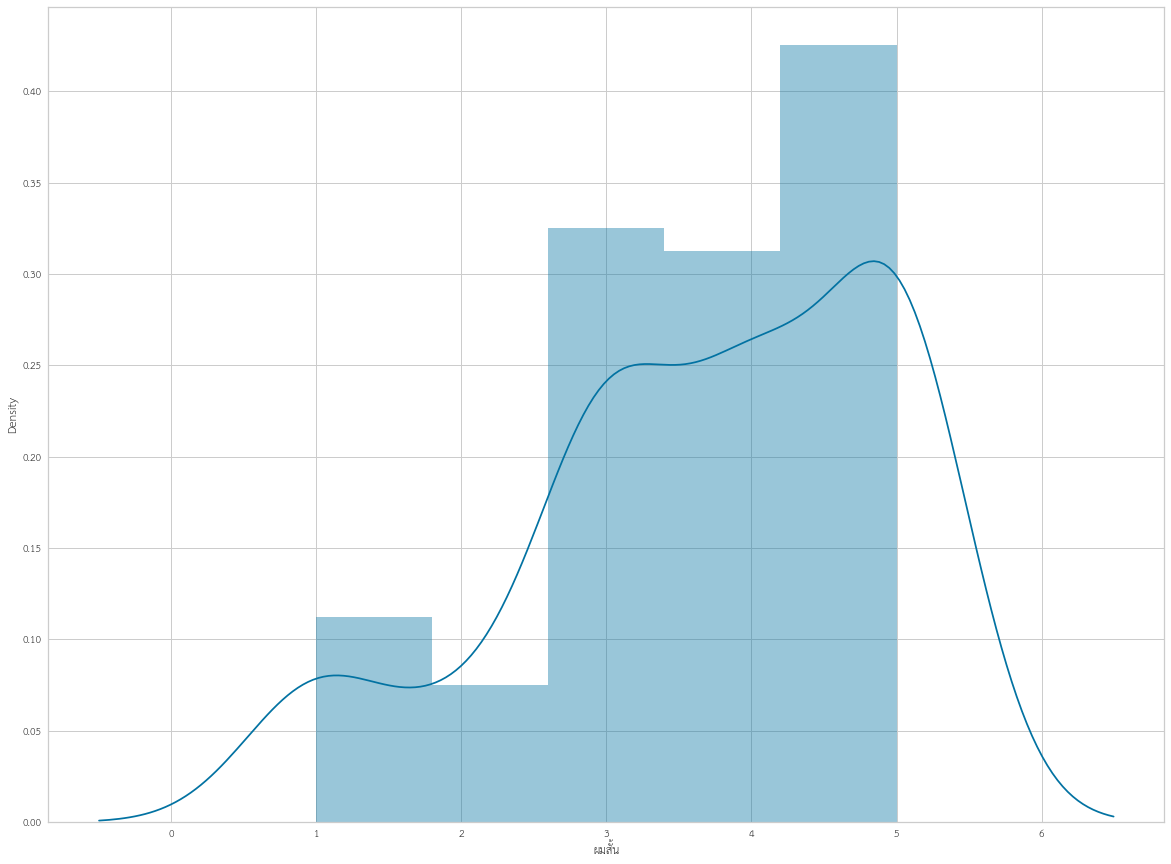

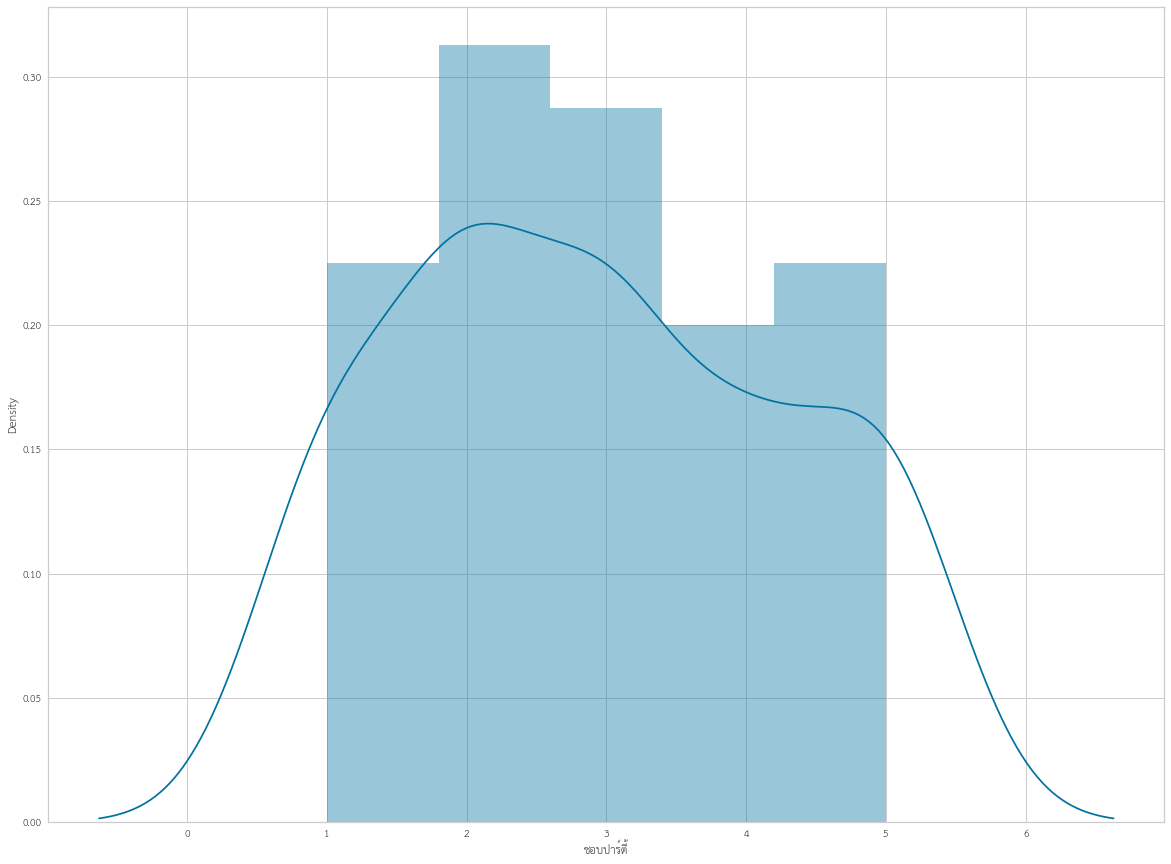

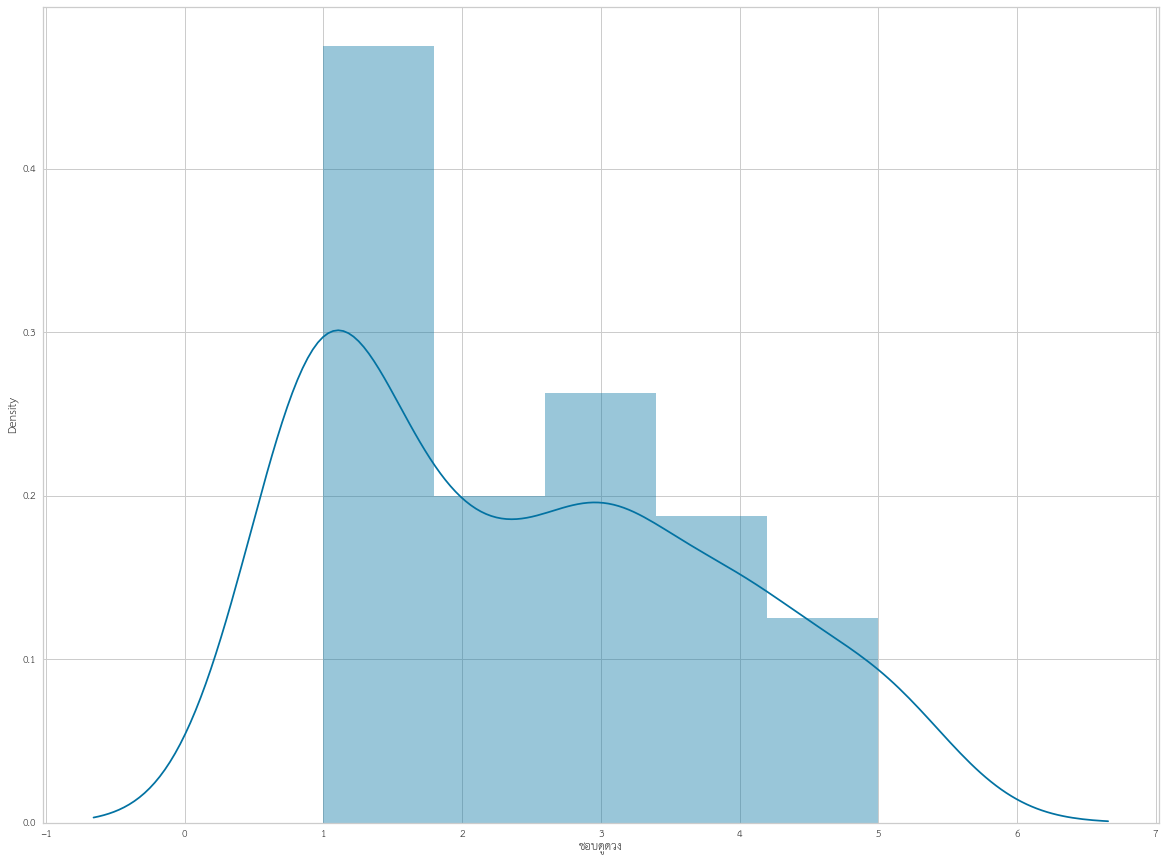

In [34]:
# see distribution of each columns
for col in df.iloc[:,3:].columns:
    sns.distplot(df[col])
    plt.show()

In [16]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['age'] = label_encoder.fit_transform(df['age'])
df.head()

,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
1,Noon,0,1,3,4,4,5,5,5,5,1,1,4,2,4,4,3,3,4
2,jjellatinn,0,1,5,5,5,5,4,4,5,5,1,5,5,5,5,1,5,5
3,ด๋อย,1,1,3,4,5,5,4,4,5,3,3,2,5,2,5,3,5,1
4,Illumi,1,1,4,4,5,3,4,5,5,1,3,3,4,3,4,3,3,3
5,Chomchom,0,0,5,2,5,5,5,3,4,4,4,4,4,5,2,3,5,5


In [17]:
cmat = df.iloc[:,2:].corr()

Text(0.5, 1.0, 'Heatmap of Original data')

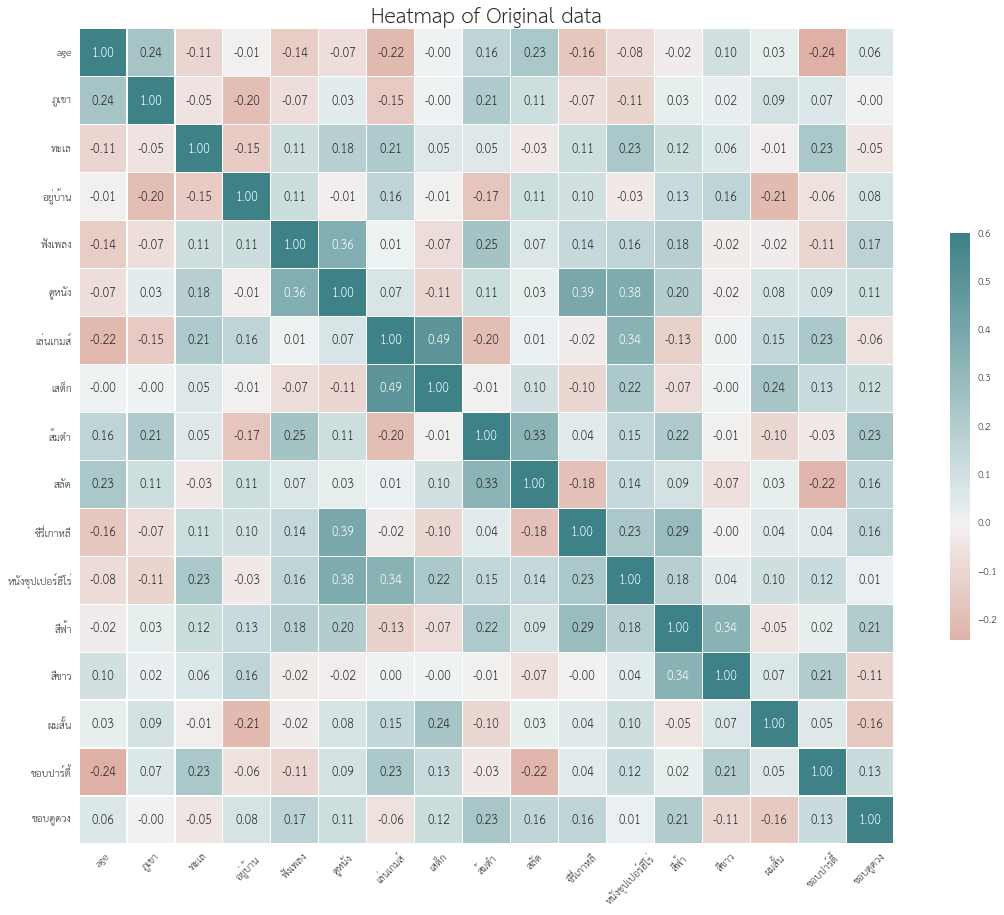

In [18]:
# ดู correlation ระหว่าง features
plt.rcParams['figure.figsize'] = [20, 15]
cmap = sns.diverging_palette(20, 200, as_cmap=True)

chart = sns.heatmap(cmat, cmap=cmap, vmax=.6, center=0, annot = True,
                    fmt=".2f", annot_kws={'fontsize': 12},
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
chart.set_title('Heatmap of Original data', fontsize = 20)

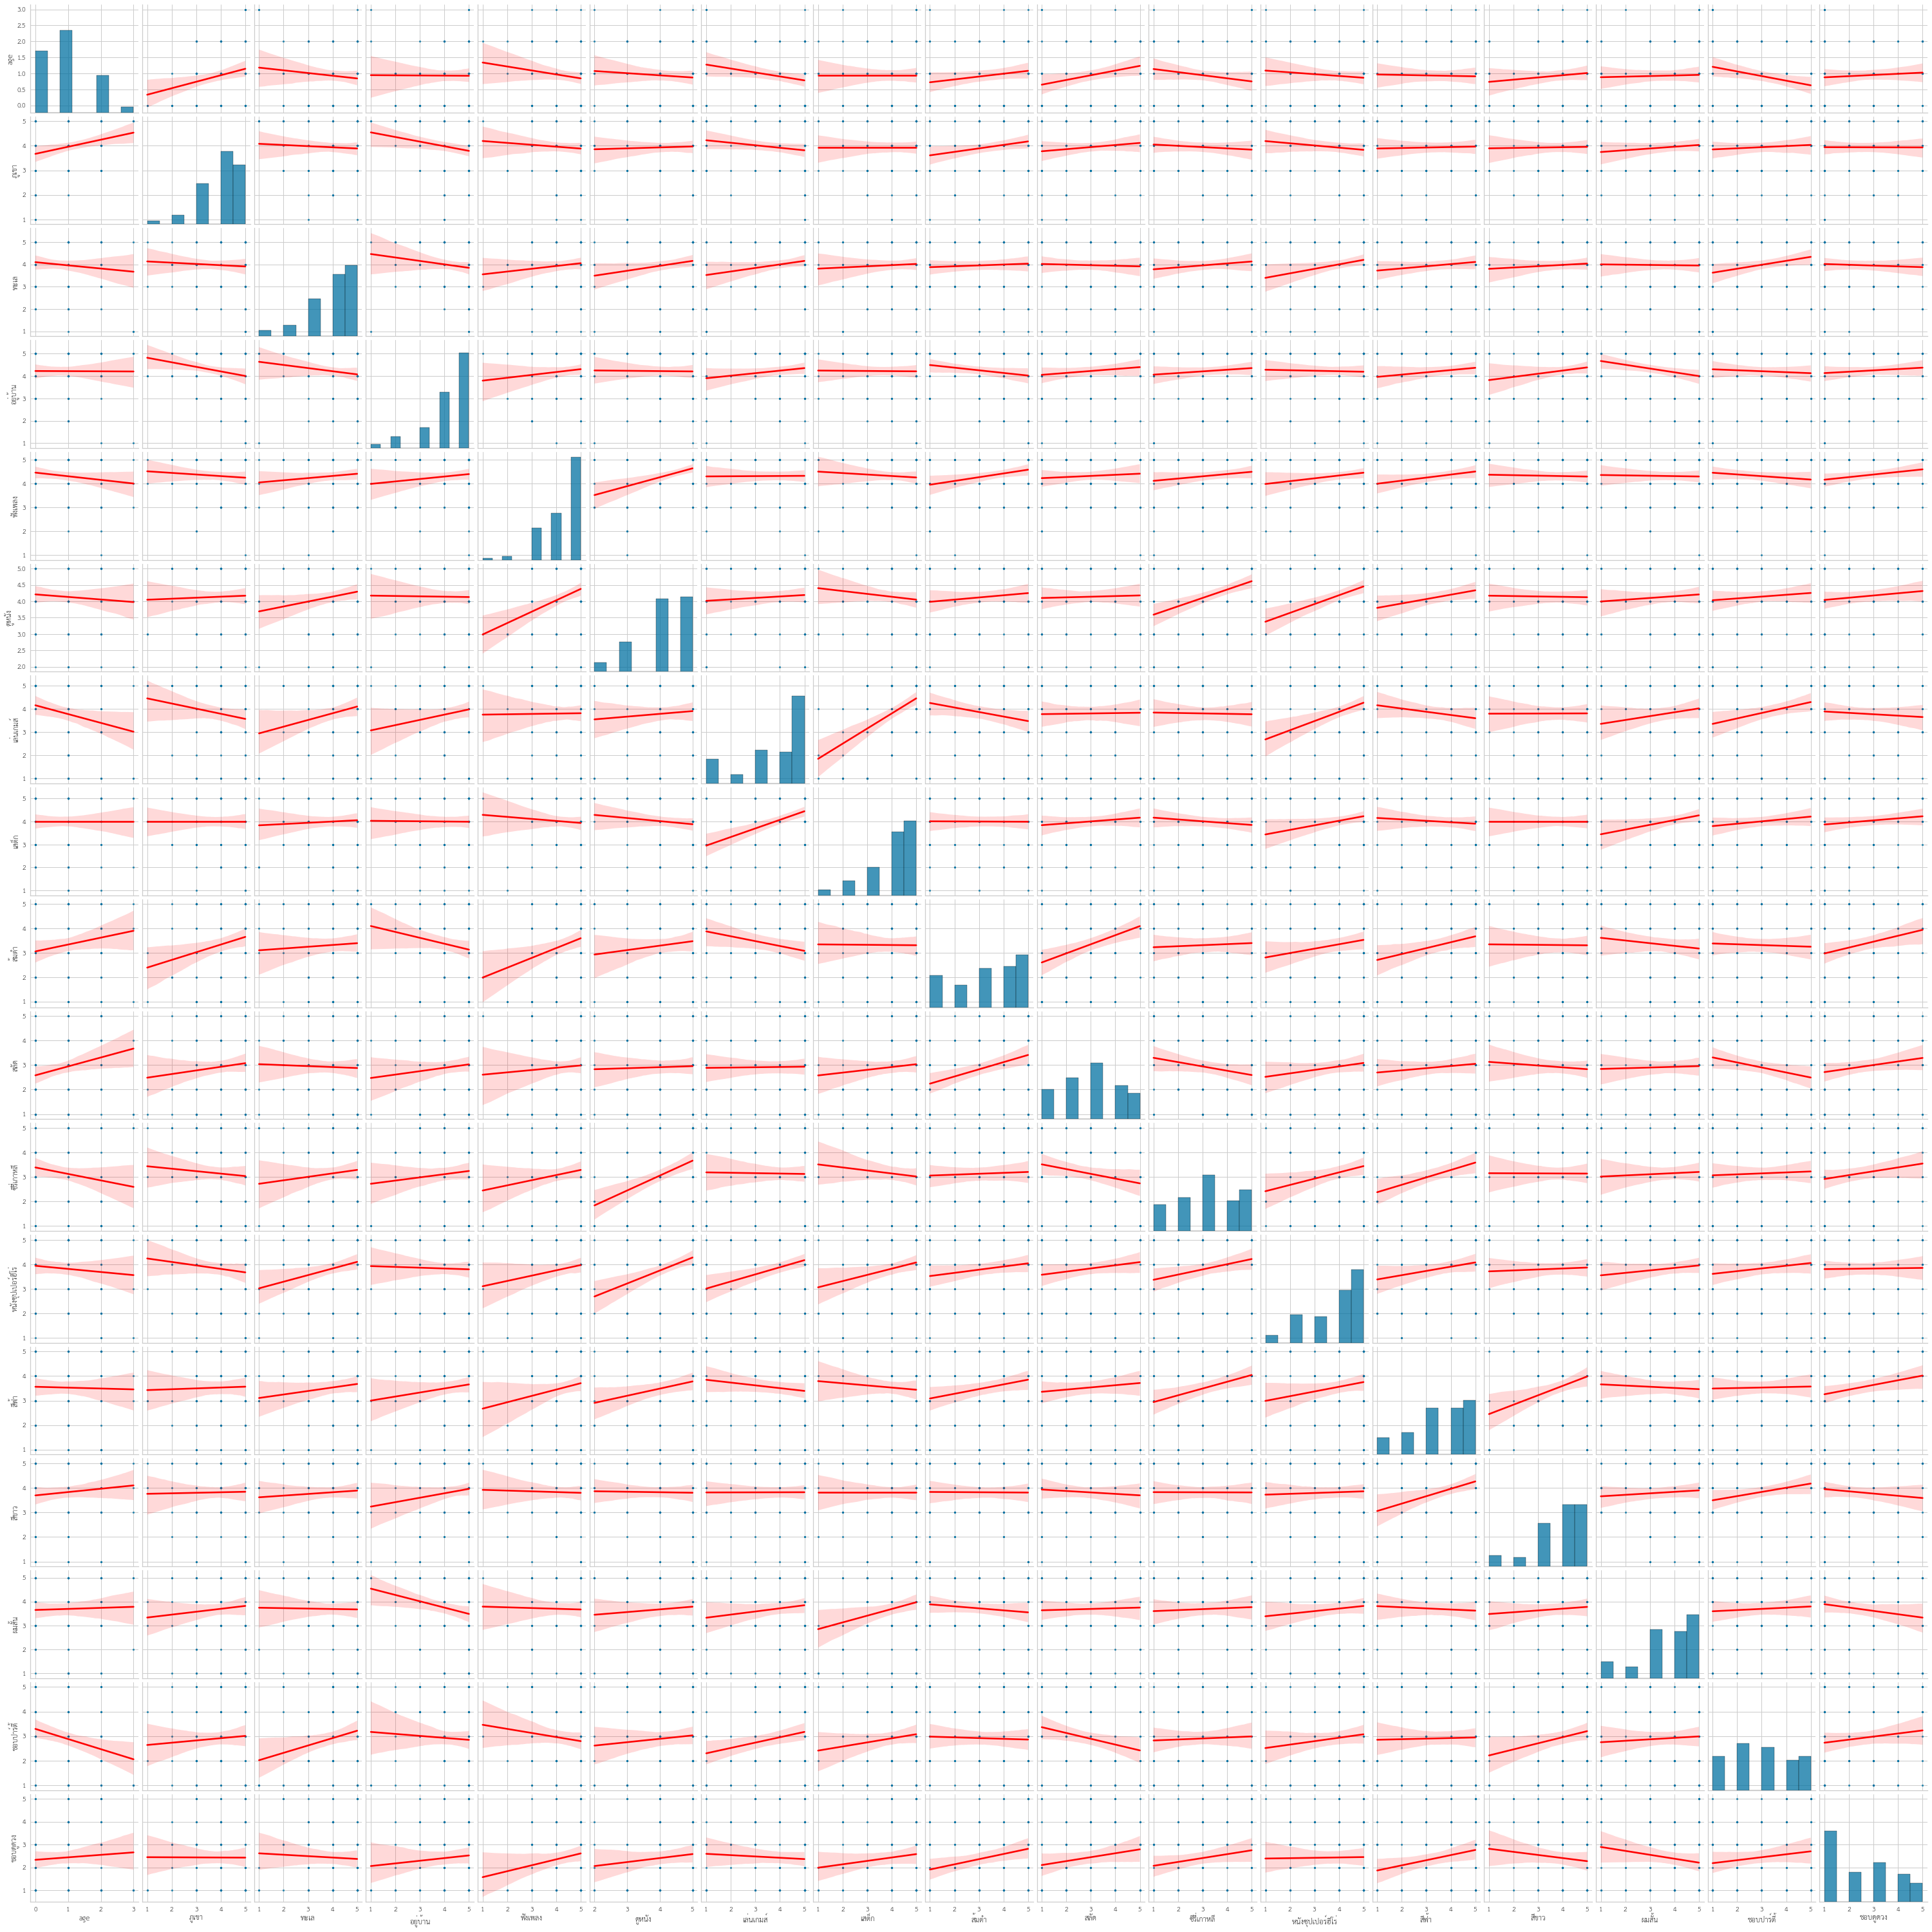

In [19]:
# ดู correlation เป็น Scatter แทนตัวเลขแบบกราฟด้านบน

plot_kws = {'scatter_kws': {'s': 10}, 'line_kws': {'color': 'red'}}
sns.pairplot(df, kind='reg', vars=df.columns[2:], plot_kws=plot_kws)
plt.show()

## The Data Master attendance data Clustering using Pycaret

In [37]:
df_pycaret = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSsec6hYwoQMBOv9oPwcJjvVqPGhKWW6y-HRnmwf9GzwSXkbxRLxu3lKmBmRKPep7my91On7Or0TPn7/pub?gid=581058147&single=true&output=csv')

In [38]:
# drop N/A and unnessesary column

df_pycaret = df_pycaret.dropna()
df_pycaret = df_pycaret.drop(columns = ['Timestamp'])
df_pycaret.head()

,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
1,Noon,Female,25 - 35,3,4,4,5,5,5,5.0,1,1,4,2,4.0,4,3.0,3,4
2,jjellatinn,Female,25 - 35,5,5,5,5,4,4,5.0,5,1,5,5,5.0,5,1.0,5,5
3,ด๋อย,Male,25 - 35,3,4,5,5,4,4,5.0,3,3,2,5,2.0,5,3.0,5,1
4,Illumi,Male,25 - 35,4,4,5,3,4,5,5.0,1,3,3,4,3.0,4,3.0,3,3
5,Chomchom,Female,18 - 25,5,2,5,5,5,3,4.0,4,4,4,4,5.0,2,3.0,5,5


In [39]:
# convert data type

convert_dict = {'เสต็ก': int,
                'สีฟ้า': int,
                'ผมสั้น': int
                }
df_pycaret = df_pycaret.astype(convert_dict)
df_pycaret.head()

,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
1,Noon,Female,25 - 35,3,4,4,5,5,5,5,1,1,4,2,4,4,3,3,4
2,jjellatinn,Female,25 - 35,5,5,5,5,4,4,5,5,1,5,5,5,5,1,5,5
3,ด๋อย,Male,25 - 35,3,4,5,5,4,4,5,3,3,2,5,2,5,3,5,1
4,Illumi,Male,25 - 35,4,4,5,3,4,5,5,1,3,3,4,3,4,3,3,3
5,Chomchom,Female,18 - 25,5,2,5,5,5,3,4,4,4,4,4,5,2,3,5,5


## Preprocess data

In [41]:
from pycaret.clustering import *

In [42]:
# setup data

s = setup(df_pycaret, normalize = False,
          ignore_features = ['nickname'],
          ordinal_features = {'gender' : ['Female', 'Male'],
                              'age' : ['18 - 25', '25 - 35', '35 - 50', '>65']}, # key = ชื่อ column : Value เป็น Unique value ใน column
          numeric_features = ['ภูเขา', 'ทะเล', 'อยู่บ้าน', 'ฟังเพลง', 'ดูหนัง', 'เล่นเกมส์', 
                              'เสต็ก', 'ส้มตำ', 'สลัด', 'ซีรี่เกาหลี','หนังซุปเปอร์ฮีโร่', 
                              'สีฟ้า', 'สีขาว', 'ผมสั้น', 'ชอบปาร์ตี้', 'ชอบดูดวง'],
          session_id = 42)

,Description,Value
0,session_id,42
1,Original Data,"(100, 19)"
2,Missing Values,False
3,Numeric Features,16
4,Categorical Features,2
5,Ordinal Features,True
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(100, 18)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['nickname'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['ภูเขา', 'ทะเล',
                                                          'อยู่บ้าน', 'ฟังเพลง',
                                                          'ดูหนัง', 'เล่นเกมส์',
                                                          'เสต็ก', 'ส้มตำ',
                                                          'สลัด', 'ซีรี่เกาหลี',
                                                          'หนังซุปเปอร์ฮีโร่',
                                                          'สีฟ้า', 'สีขาว',
                      

In [43]:
df_pycaret_preprocess = get_config('X')
df_pycaret_preprocess

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as      gender  age  ภูเขา  ทะเล  อยู่บ้าน  ฟังเพลง  ดูหนัง  เล่นเกมส์  เสต็ก  \
1       0.0  1.0    3.0   4.0       4.0      5.0     5.0        5.0    5.0   
2       0.0  1.0    5.0   5.0       5.0      5.0     4.0        4.0    5.0   
3       1.0  1.0    3.0   4.0       5.0      5.0     4.0        4.0    5.0   
4       1.0  1.0    4.0   4.0       5.0      3.0     4.0        5.0    5.0   
5       0.0  0.0    5.0   2.0       5.0      5.0     5.0        3.0    4.0   
..      ...  ...    ...   ...       ...      ...     ...        ...    ...   
98      1.0  0.0    5.0   5.0       2.0      5.0     5.0        5.0    4.0   
99      1.0  1.0    4.0   4.0       5.0      5.0     4.0        5.0    5.0   
100     0.0  2.0    3.0   4.0       5.0      5.0     5.0        5.0    4.0   
101     1.0  2.0    4.0   3.0       4.0      4.0     4.0        3.0    5.0   
102     1.0  1.0    3.0   5.0   

,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง
1,0.0,1.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,4.0,4.0,3.0,3.0,4.0
2,0.0,1.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0
3,1.0,1.0,3.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,3.0,2.0,5.0,2.0,5.0,3.0,5.0,1.0
4,1.0,1.0,4.0,4.0,5.0,3.0,4.0,5.0,5.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0
5,0.0,0.0,5.0,2.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.0,0.0,5.0,5.0,2.0,5.0,5.0,5.0,4.0,4.0,2.0,3.0,2.0,5.0,5.0,5.0,4.0,2.0
99,1.0,1.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
100,0.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
101,1.0,2.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,3.0,3.0,2.0,2.0,1.0,5.0,5.0,2.0,3.0


In [45]:
# pycaret clustering model
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


### Choosing algorithm

In [46]:
model_kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0924,9.7503,2.2065,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [47]:
model_kmodes = create_model('kmodes')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0022,2.5951,5.2245,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x7fa7cc202160>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=42,
       verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [49]:
model_meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2484,2.5163,0.6079,0,0,0


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=-1, seeds=None)
INFO:logs:create_model() succesfully completed......................................


In [48]:
model_hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0657,8.0541,2.412,0,0,0


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)
INFO:logs:create_model() succesfully completed......................................


In [53]:
model_dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 9
INFO:logs:DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


## Trying these algorithm

- kmeans
- hclust
- dbscan

### kmeans

In [108]:
model_kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0924,9.7503,2.2065,0,0,0


INFO:logs:create_model_container: 47
INFO:logs:master_model_container: 47
INFO:logs:display_container: 48
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [54]:
plot_model(model_kmeans, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


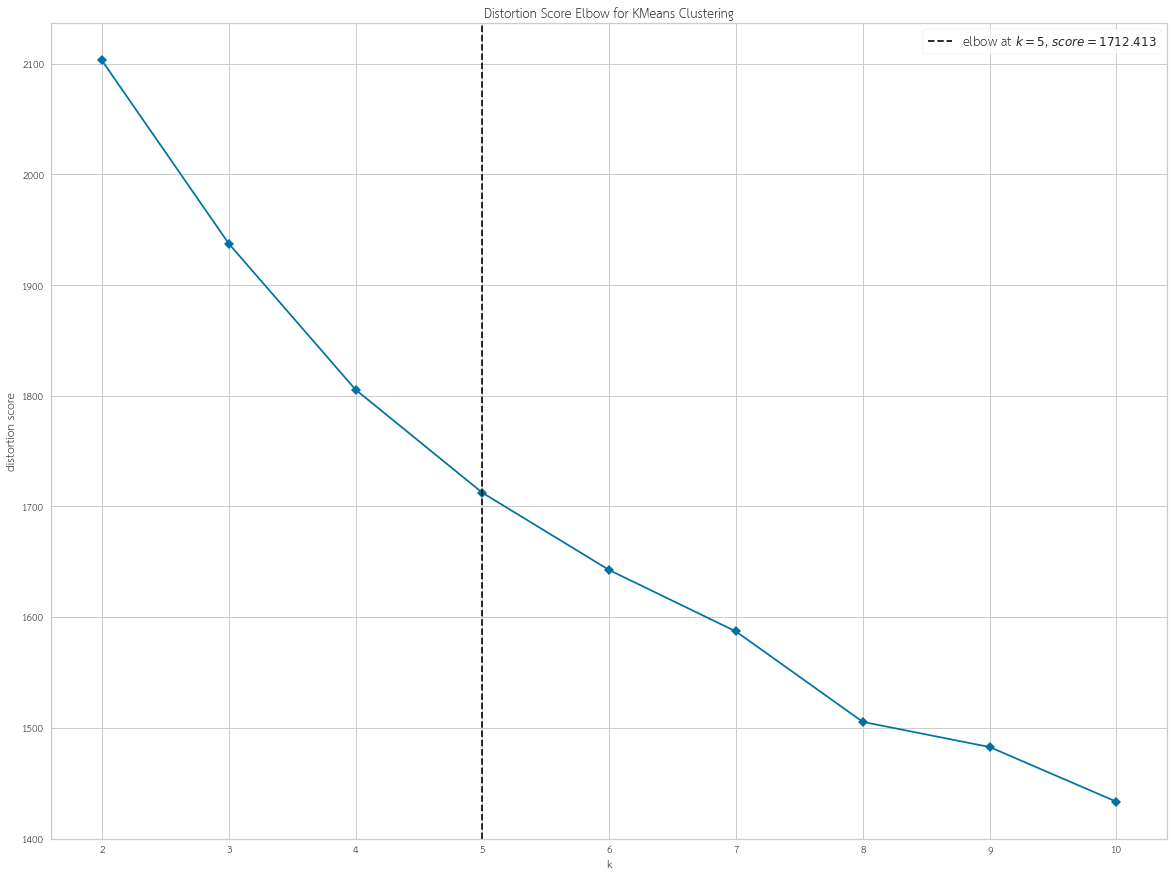

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [55]:
plot_model(model_kmeans, 'elbow')

In [57]:
model_kmeans5 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0805,8.9222,2.2277,0,0,0


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 11
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [58]:
plot_model(model_kmeans5, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [59]:
plot_model(model_kmeans5, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


### hclust model

In [65]:
model_hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0657,8.0541,2.412,0,0,0


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 13
INFO:logs:AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)
INFO:logs:create_model() succesfully completed......................................


In [66]:
plot_model(model_hclust, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


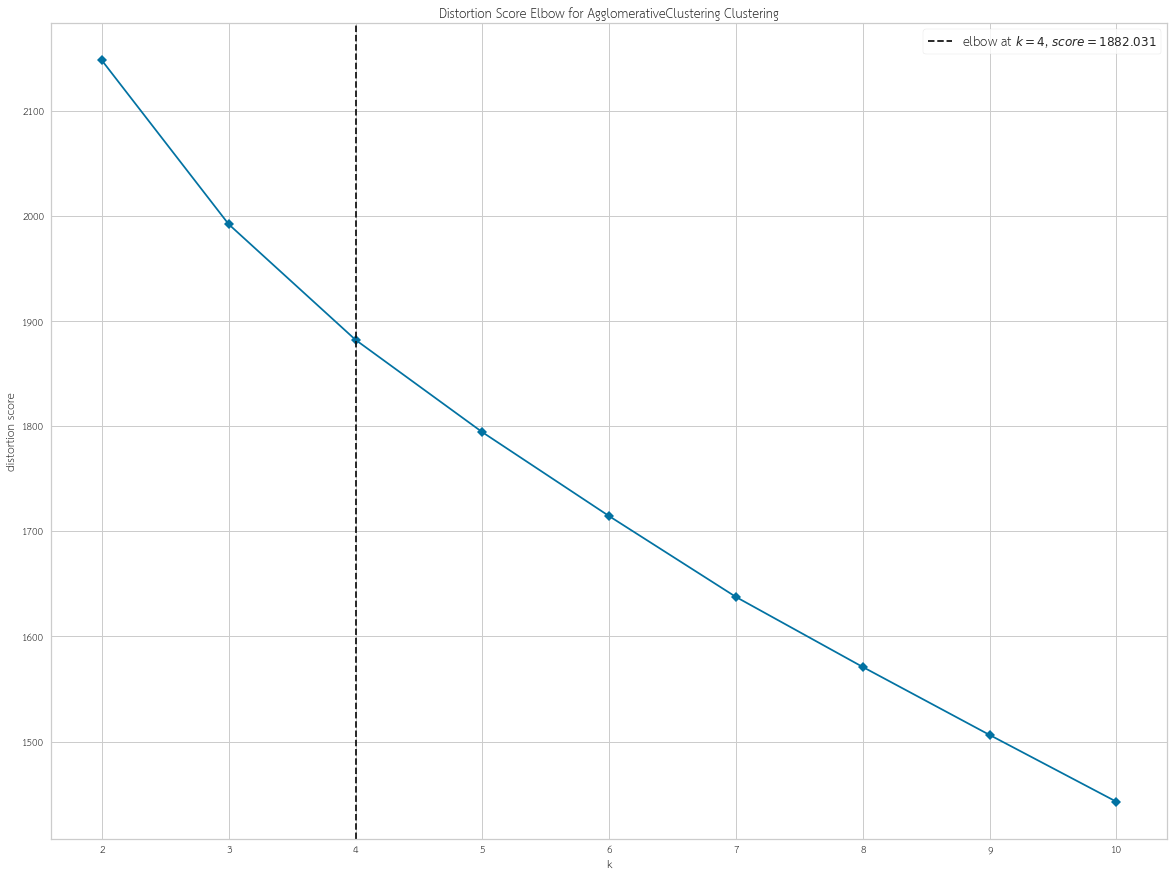

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(model_hclust, 'elbow')

In [68]:
plot_model(create_model('hclust', num_clusters = 5), 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


### DBSCAN

In [69]:
model_db = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 15
INFO:logs:DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


In [70]:
print(model_db)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


In [106]:
model_db = create_model('dbscan', eps=6, min_samples=10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2484,2.5163,0.6079,0,0,0


INFO:logs:create_model_container: 46
INFO:logs:master_model_container: 46
INFO:logs:display_container: 47
INFO:logs:DBSCAN(algorithm='auto', eps=6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


In [107]:
plot_model(model_db, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


### เลือกใช้ kmeans โดยใช้จำนวน cluster = 5

เพราะจาก visualization cluster ดูแยกจากกันมากที่สุด โดย Silhouette ไม่ค่อยดีทั้งหมดในทุก algorithm

In [109]:
model_kmeans5 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0805,8.9222,2.2277,0,0,0


INFO:logs:create_model_container: 48
INFO:logs:master_model_container: 48
INFO:logs:display_container: 49
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [110]:
plot_model(model_kmeans5, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [111]:
results = assign_model(model_kmeans5)

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(100, 20)
INFO:logs:assign_model() succesfully completed......................................


In [112]:
results.head()

,nickname,gender,age,ภูเขา,ทะเล,อยู่บ้าน,ฟังเพลง,ดูหนัง,เล่นเกมส์,เสต็ก,ส้มตำ,สลัด,ซีรี่เกาหลี,หนังซุปเปอร์ฮีโร่,สีฟ้า,สีขาว,ผมสั้น,ชอบปาร์ตี้,ชอบดูดวง,Cluster
1,Noon,Female,25 - 35,3,4,4,5,5,5,5,1,1,4,2,4,4,3,3,4,Cluster 4
2,jjellatinn,Female,25 - 35,5,5,5,5,4,4,5,5,1,5,5,5,5,1,5,5,Cluster 1
3,ด๋อย,Male,25 - 35,3,4,5,5,4,4,5,3,3,2,5,2,5,3,5,1,Cluster 4
4,Illumi,Male,25 - 35,4,4,5,3,4,5,5,1,3,3,4,3,4,3,3,3,Cluster 4
5,Chomchom,Female,18 - 25,5,2,5,5,5,3,4,4,4,4,4,5,2,3,5,5,Cluster 1


In [136]:
# rename cluster
re_clust = {'Cluster 0': 'Cluster 1',
          'Cluster 1': 'Cluster 2',
          'Cluster 2': 'Cluster 3',
          'Cluster 3': 'Cluster 4',
          'Cluster 4': 'Cluster 5'}

results = results.replace(re_clust)

In [137]:
results['Cluster']

1      Cluster 5
2      Cluster 2
3      Cluster 5
4      Cluster 5
5      Cluster 2
         ...    
98     Cluster 2
99     Cluster 4
100    Cluster 2
101    Cluster 4
102    Cluster 4
Name: Cluster, Length: 100, dtype: object

In [138]:
plot_kws = {'scatter_kws': {'s': 10}}
sns.pairplot(results, kind='reg', vars=results.columns[3:19], plot_kws=plot_kws, hue="Cluster")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### ดู Charactor ของผู้คนที่อยู่ในแต่ละ cluster

- cluster 1 - 3 มีจำนวน ผช และ ผญ ใกล้เคียงกัน แต่ cluster 4 และ 5 มีจำนวน ผช มากกว่า ผญ อย่างชัดเจน
- cluster 1 มีจำนวนคนที่อายุ 25-35 น้อยกว่า cluster อื่่นประมาณ 30%
- cluster 5 มีจำนวนคนที่อายุ 18-25 มากที่สุด

In [192]:
cluster_order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
hue_order = ['18 - 25', '25 - 35', '35 - 50', '>65']

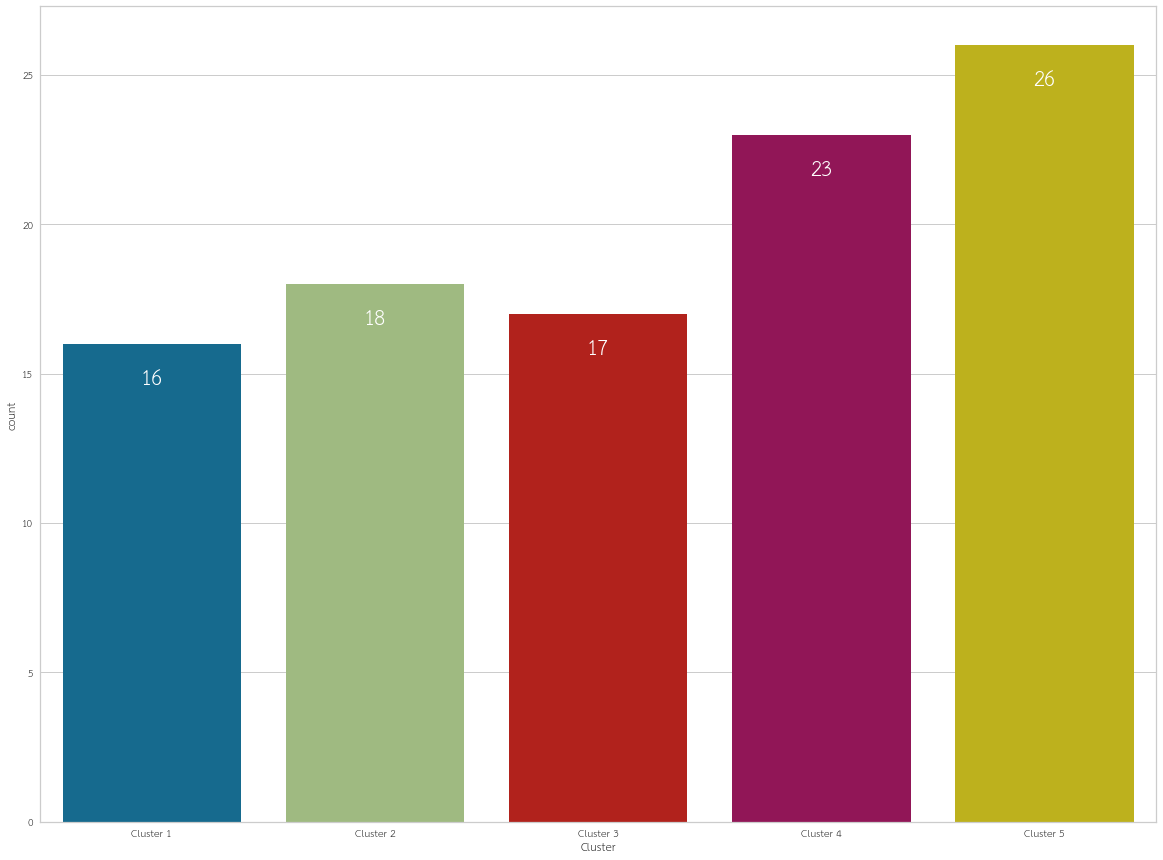

In [194]:
# จำนวนคนในแต่ละ cluster

ax = sns.countplot(data=results, x="Cluster", order = cluster_order)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)

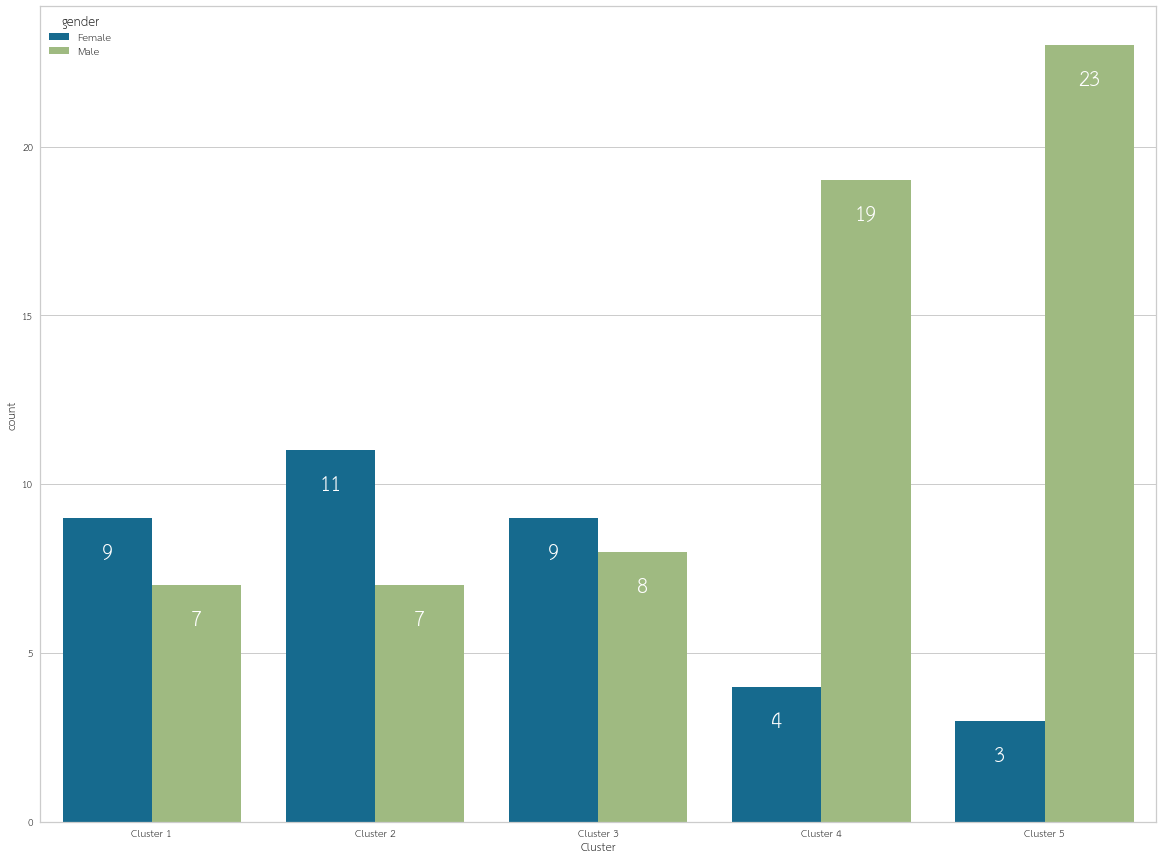

In [195]:
# จำนวน ผช และ ผญ ในแต่ละ cluster

ax = sns.countplot(data=results, x="Cluster", hue="gender", order = cluster_order)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)

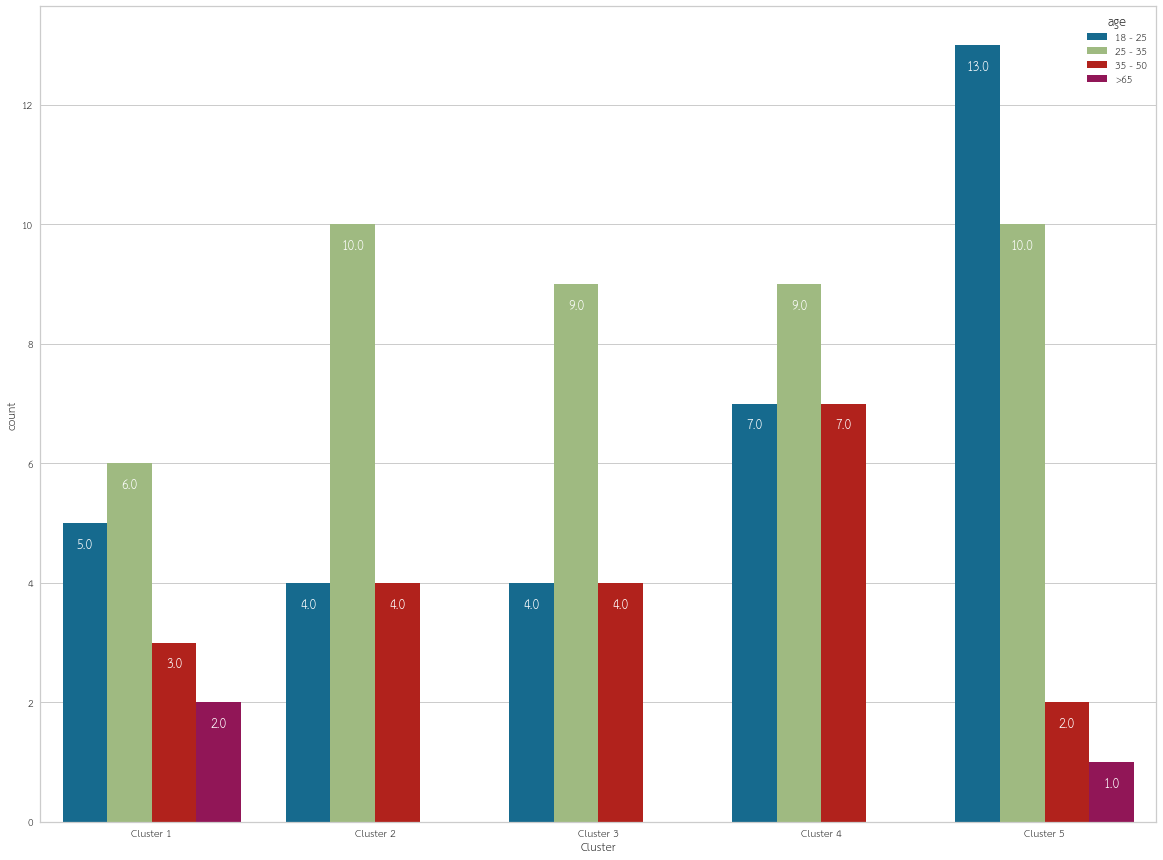

In [196]:
# จำนวนคนในแต่ละช่วงอายุของแต่ละ cluster

ax = sns.countplot(data=results, x="Cluster", hue="age", order = cluster_order, hue_order = hue_order )
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), ha='center', va='top', color='white', size=12)

## ลองดูความสัมพันธ์ของ feature ที่น่าสนใจร่วมกับ cluster ที่จับกลุ่มมา

โดยอาจจะคิดว่าถ้าเราเป็นคนทำคอร์สนี้จะทำอะไรกับข้อมูลที่มีนี้ได้บ้าง

1. จัดกิจกรรมอะไรดี?
    - ลองดูความสัมพันธ์ของการเล่นเกมกับดูดวง
    - Cluster 4 และ 5 ไม่ชอบดูดวงแต่ชอบเล่นเกมส์ ซึ่งเป็น cluster ที่มี ผช เยอะมาก และเป็น cluster ที่มีจำนวนคนอายุน้อยสูงทั้งคู่ 
    - ซึ่งถ้าต้องการทำกิจกรรมที่น่าดึงดูดสำหรับ 2 cluster นี้ซึ่งเป็นครึ่งนึงของคนทั้งหมด อาจจะต้องเป็นการเล่นเกมที่มีกติกาชัดเจน และเน้นที่กระบวนการมากกว่าโชค

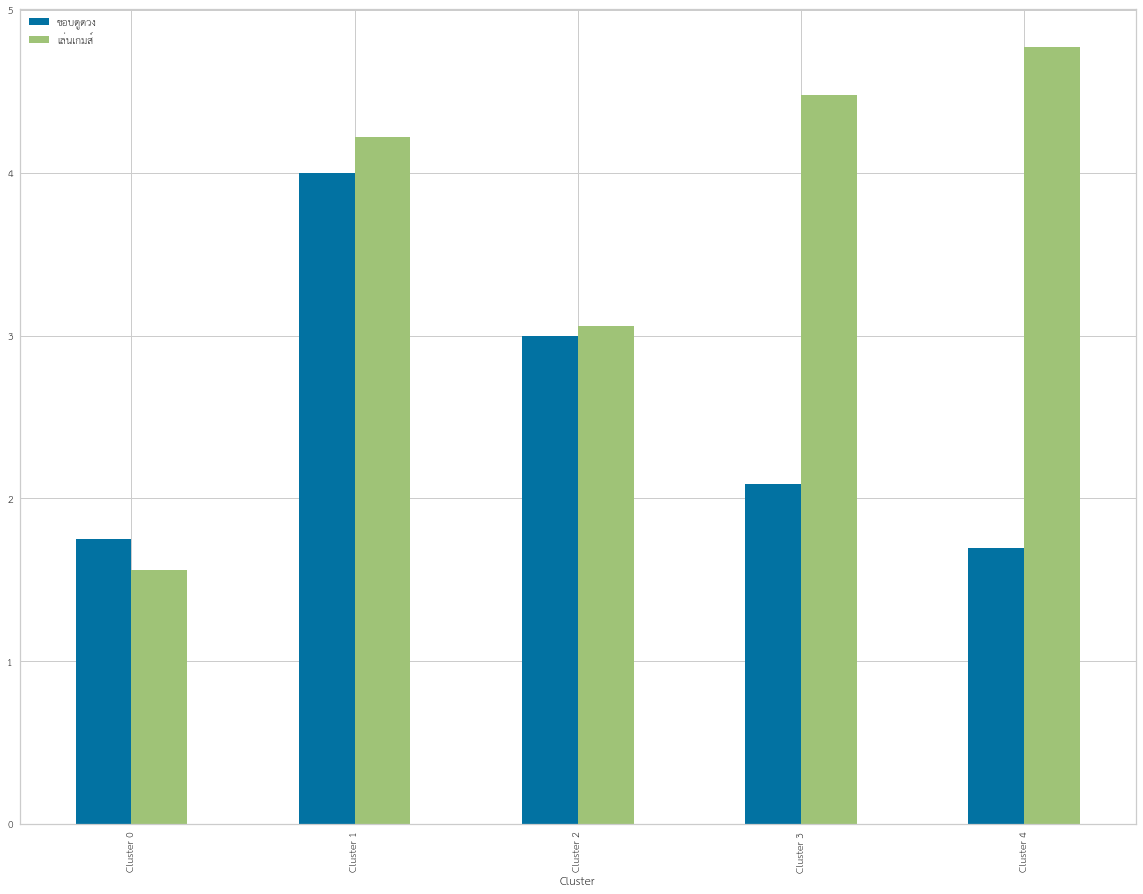

In [127]:
# ดูความสัมพันธ์ของการดูดวงและเล่นเกม
ดูดวง_เล่นเกมส์.plot.bar()

2. อาหารที่น่าสนใจตอนจัดกิจกรรม onsite

    - ความสัมพันธ์ระหว่างส้มตำ เสต็ก และสลัด
    - cluster 4(ผช) และ 5(ผช อายุน้อย) ชอบเสต็กมากกว่าส้มตำ ซึ่งเป็นจำนวนเกือบครึ่งนึงของคนทั้งหมด ส่วนกลุ่มอื่นถึงแม้จะชอบส้มตำมากกว่า แต่ไม่มาก ถ้าใช้เสต็ก ส้มตำ และสลัดเป็นรายการอาหารในการทำกิจกรรม onsite อาจจะต้องเตรียมเสต็กมากกว่าส้มตำ
    - สลัดอาจจะต้องเตรียมให้พอกับจำนวน cluster 4 เพราะมีแนวโน้มที่จะชอบสลัดมากกว่าส้มตำ อาจจะเป็นเพราะเป็นกลุ่มที่มีคนอายุ 35-40 เยอะ ซึ่งอาจจะมีความคิดที่ต้องการดูแลสุขภาพมากกว่าเด็กๆ

In [200]:
# ความสัมพันธ์ของส้มตำ เสต็ก และสลัด

อาหาร = results[['ส้มตำ', 'เสต็ก', 'สลัด', 'Cluster']].groupby(['Cluster']).mean()
อาหาร

,ส้มตำ,เสต็ก,สลัด
Cluster,,,
Cluster 1,3.312500,2.875000,2.875000
Cluster 2,4.333333,4.277778,3.055556
Cluster 3,4.000000,3.705882,3.176471
Cluster 4,3.608696,4.478261,3.782609
Cluster 5,1.923077,4.269231,1.923077


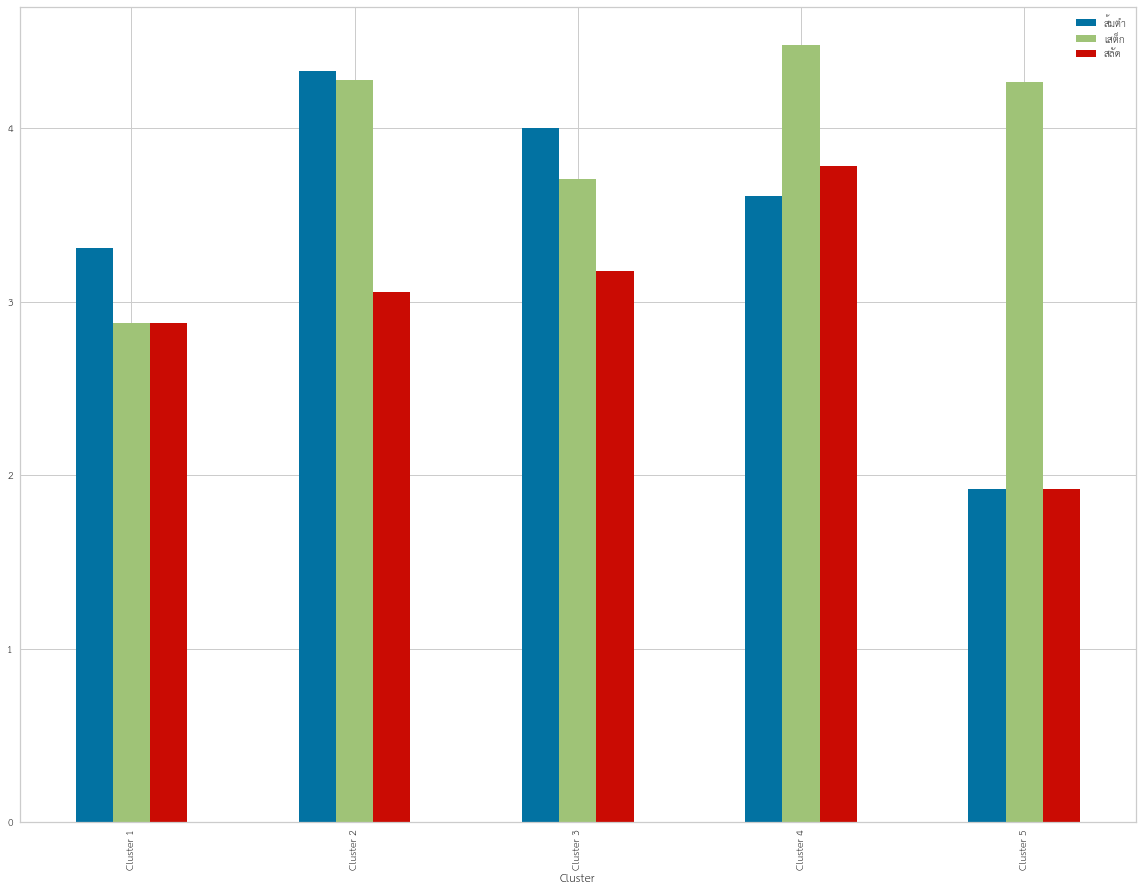

In [201]:
อาหาร.plot.bar()